In [1]:
import acquire
import numpy as np
import pandas as pd
from env import username, password, host
import os
from sklearn import datasets
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats
from sklearn.model_selection import train_test_split

import warnings
warnings.filterwarnings("ignore")

from pydataset import data

import sklearn.metrics as metrics
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, recall_score
from sklearn.metrics import precision_score, f1_score
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression

# Titanic Dataset

### 1. What is your baseline prediction? What is your baseline accuracy? remember: your baseline prediction for a classification problem is predicting the most prevelant class in the training dataset (the mode). When you make those predictions, what is your accuracy? This is your baseline accuracy.

In [2]:
titanic = acquire.grab_titanic_data()
titanic.head()

,Unnamed: 0,passenger_id,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,deck,embark_town,alone
0,0,0,0,3,male,22.0,1,0,7.2500,S,Third,NaN,Southampton,0
1,1,1,1,1,female,38.0,1,0,71.2833,C,First,C,Cherbourg,0
2,2,2,1,3,female,26.0,0,0,7.9250,S,Third,NaN,Southampton,1
3,3,3,1,1,female,35.0,1,0,53.1000,S,First,C,Southampton,0
4,4,4,0,3,male,35.0,0,0,8.0500,S,Third,NaN,Southampton,1


In [3]:
titanic = acquire.prep_titanic(titanic)
#titanic.rename(columns={'sex': 'isMale'}, inplace=True)
titanic.head(10)

,survived,pclass,isMale,age,sibsp,parch,fare,embark_town,alone
0,0,3,1,22.0,1,0,7.2500,1.0,0
1,1,1,0,38.0,1,0,71.2833,2.0,0
2,1,3,0,26.0,0,0,7.9250,1.0,1
3,1,1,0,35.0,1,0,53.1000,1.0,0
4,0,3,1,35.0,0,0,8.0500,1.0,1
5,0,3,1,28.0,0,0,8.4583,3.0,1
6,0,1,1,54.0,0,0,51.8625,1.0,1
7,0,3,1,2.0,3,1,21.0750,1.0,0
8,1,3,0,27.0,0,2,11.1333,1.0,0
9,1,2,0,14.0,1,0,30.0708,2.0,0


In [4]:
print(f'{titanic.age.mean()}')
print(f'{titanic.age.mode()}')
print(titanic.age.median())

29.36158249158249
0    28.0
Name: age, dtype: float64
28.0


In [5]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   survived     891 non-null    int64  
 1   pclass       891 non-null    int64  
 2   isMale       891 non-null    object 
 3   age          891 non-null    float64
 4   sibsp        891 non-null    int64  
 5   parch        891 non-null    int64  
 6   fare         891 non-null    float64
 7   embark_town  891 non-null    float64
 8   alone        891 non-null    int64  
dtypes: float64(3), int64(5), object(1)
memory usage: 62.8+ KB


In [6]:
#titanic.age[titanic.age.isnull()] = 28
#titanic.head(10)

In [7]:
#titanic[titanic.age == 'NaN'] = 28

In [8]:
titanic.embark_town.value_counts()

1.0    646
2.0    168
3.0     77
Name: embark_town, dtype: int64

In [9]:
#titanic.embark_town[titanic.embark_town.isnull()] = 1.0

In [10]:
#titanic.isMale[titanic.isMale == 'male'] = 1
#titanic.isMale[titanic.isMale == 'female'] = 0
#titanic.head(10)

In [11]:
t_train, t_validate, t_test = acquire.split(titanic)
t_train.shape, t_validate.shape, t_test.shape

((534, 9), (178, 9), (179, 9))

In [12]:
(t_train.survived == 1).mean()

0.40074906367041196

## What is your baseline prediction?  What is your baseline accuracy? 

In [13]:
t_train['baseline'] = 0

In [14]:
t_train.baseline.value_counts()

0    534
Name: baseline, dtype: int64

In [15]:
#t_train = t_train.drop(columns='Unnamed: 0')
t_train.head()

,survived,pclass,isMale,age,sibsp,parch,fare,embark_town,alone,baseline
304,0,3,1,28.0,0,0,8.0500,1.0,1,0
718,0,3,1,28.0,0,0,15.5000,3.0,1,0
102,0,1,1,21.0,0,1,77.2875,1.0,0,0
737,1,1,1,35.0,0,0,512.3292,2.0,1,0
269,1,1,0,35.0,0,0,135.6333,1.0,1,0


In [16]:
print(f'Baseline accuracy: {metrics.accuracy_score(t_train.survived, t_train.baseline):.3f}, This is predicting for non-survival')

Baseline accuracy: 0.599, This is predicting for non-survival


### 2. Fit the decision tree classifier to your training sample and transform (i.e. make predictions on the training sample)

In [17]:
#t_train.sex[t_train.sex == 'male'] = 1
#t_train.sex[t_train.sex == 'female'] = 0
#t_train[t_train.sex == 'female'] = 0
#t_train.rename(columns={'sex': 'isMale'})
t_train.head()

,survived,pclass,isMale,age,sibsp,parch,fare,embark_town,alone,baseline
304,0,3,1,28.0,0,0,8.0500,1.0,1,0
718,0,3,1,28.0,0,0,15.5000,3.0,1,0
102,0,1,1,21.0,0,1,77.2875,1.0,0,0
737,1,1,1,35.0,0,0,512.3292,2.0,1,0
269,1,1,0,35.0,0,0,135.6333,1.0,1,0


In [18]:
x_tr = t_train.drop(columns={'survived','baseline'})
y_tr = t_train.survived

x_val = t_validate.drop(columns='survived')
y_val = t_validate.survived

x_test = t_test.drop(columns='survived')
y_test = t_test.survived

x_tr.head()

,pclass,isMale,age,sibsp,parch,fare,embark_town,alone
304,3,1,28.0,0,0,8.0500,1.0,1
718,3,1,28.0,0,0,15.5000,3.0,1
102,1,1,21.0,0,1,77.2875,1.0,0
737,1,1,35.0,0,0,512.3292,2.0,1
269,1,0,35.0,0,0,135.6333,1.0,1


In [19]:
x_tr.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 534 entries, 304 to 133
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   pclass       534 non-null    int64  
 1   isMale       534 non-null    object 
 2   age          534 non-null    float64
 3   sibsp        534 non-null    int64  
 4   parch        534 non-null    int64  
 5   fare         534 non-null    float64
 6   embark_town  534 non-null    float64
 7   alone        534 non-null    int64  
dtypes: float64(3), int64(4), object(1)
memory usage: 37.5+ KB


In [20]:
t_classf = DecisionTreeClassifier()
t_classf = t_classf.fit(x_tr, y_tr)

y_predict = t_classf.predict(x_tr)
y_predict_prob = t_classf.predict_proba(x_tr)

In [21]:
t_classf.fit(x_tr, y_tr)

DecisionTreeClassifier()

### 3. Evaluate your in-sample results using the model score, confusion matrix, and classification report.

In [22]:
print(f'Model score: {t_classf.score(x_tr, y_tr):.3f}')

Model score: 0.987


In [23]:
cm = confusion_matrix(y_tr, y_predict)
pd.DataFrame(cm)

,0,1
0,319,1
1,6,208


In [24]:
pd.DataFrame(classification_report(y_tr, y_predict, output_dict=True))

,0,1,accuracy,macro avg,weighted avg
precision,0.981538,0.995215,0.986891,0.988377,0.987019
recall,0.996875,0.971963,0.986891,0.984419,0.986891
f1-score,0.989147,0.983452,0.986891,0.986299,0.986865
support,320.000000,214.000000,0.986891,534.000000,534.000000


### 4. Compute: Accuracy, true positive rate, false positive rate, true negative rate, false negative rate, precision, recall, f1-score, and support.

##### Accuracy:

In [25]:
accuracy_score(y_tr, y_predict)

0.9868913857677902

##### TP, TN, FP, FN rates: 

In [26]:
TP = cm[0,0]
TN = cm[1,1]
FP = cm[0,1]
FN = cm[1,0]
print(f' True Positive rate: {TP/(TP+TN+FP+FN)}')
print(f'False Positive rate: {FP/(TP+TN+FP+FN)}')
print(f' True Negative rate: {TN/(TP+TN+FP+FN)}')
print(f'False Negative rate: {FN/(TP+TN+FP+FN)}')

 True Positive rate: 0.5973782771535581
False Positive rate: 0.0018726591760299626
 True Negative rate: 0.3895131086142322
False Negative rate: 0.011235955056179775


##### Precision, Recall, f1-score and support:

In [27]:
print(f'Precision: {precision_score(y_tr, y_predict)}')
print(f'   Recall: {recall_score(y_tr, y_predict)}')
print(f'       F1: {f1_score(y_tr, y_predict)}')
print(f'  Support: NotSurvived: {TP+FP}')
print(f'           Survived: {TN+FN}')

Precision: 0.9952153110047847
   Recall: 0.9719626168224299
       F1: 0.9834515366430261
  Support: NotSurvived: 320
           Survived: 214


### 5. Run through steps 2-4 using a different max_depth value.

This is a different Decision Tree Classifier because of the max_depth value being changed

In [28]:
t_classf2 = DecisionTreeClassifier(max_depth=4)
t_classf2 = t_classf2.fit(x_tr, y_tr)

y_predict2 = t_classf2.predict(x_tr)
y_predict_prob2 = t_classf2.predict_proba(x_tr)

In [29]:
print(f'Model score: {t_classf2.score(x_tr, y_tr)*100}')

Model score: 82.77153558052434


In [30]:
cm2 = confusion_matrix(y_tr, y_predict2)
pd.DataFrame(cm2)

,0,1
0,313,7
1,85,129


In [31]:
pd.DataFrame(classification_report(y_tr, y_predict2, output_dict=True))

,0,1,accuracy,macro avg,weighted avg
precision,0.786432,0.948529,0.827715,0.867481,0.851392
recall,0.978125,0.602804,0.827715,0.790464,0.827715
f1-score,0.871866,0.737143,0.827715,0.804505,0.817876
support,320.000000,214.000000,0.827715,534.000000,534.000000


In [32]:
print(f'Accuracy: {accuracy_score(y_tr, y_predict2)*100}')

Accuracy: 82.77153558052434


In [33]:
TP2 = cm2[0,0]
TN2 = cm2[1,1]
FP2 = cm2[0,1]
FN2 = cm2[1,0]
print('TP, TN, FP, FN rates:')
print()
print(f'TP - True Positive rate:  {TP2/(TP2+TN2+FP2+FN2):.3f}')
print(f'FP - False Positive rate: {FP2/(TP2+TN2+FP2+FN2):.3f}')
print(f'TN - True Negative rate:  {TN2/(TP2+TN2+FP2+FN2):.3f}')
print(f'FN - False Negative rate: {FN2/(TP2+TN2+FP2+FN2):.3f}')

TP, TN, FP, FN rates:

TP - True Positive rate:  0.586
FP - False Positive rate: 0.013
TN - True Negative rate:  0.242
FN - False Negative rate: 0.159


In [34]:
print('Model 1 -')
print()
print(f'Precision: {precision_score(y_tr, y_predict2):.3f}%')
print()
print(f'   Recall: {recall_score(y_tr, y_predict2):.3f}%')
print()
print(f'       F1: {f1_score(y_tr, y_predict2):.3f}%')
print()
print(f'  Support: NotSurvived: {TP2+FP2}')
print(f'           Survived:    {TN2+FN2}')

Model 1 -

Precision: 0.949%

   Recall: 0.603%

       F1: 0.737%

  Support: NotSurvived: 320
           Survived:    214


In [35]:
print('Model 2 -')
print()
print(f'Precision: {precision_score(y_tr, y_predict):.3f}%')
print()
print(f'   Recall: {recall_score(y_tr, y_predict):.3f}%')
print()
print(f'       F1: {f1_score(y_tr, y_predict):.3f}%')
print()
print(f'  Support: ')
print(f' NotSurvived: {TP+FP}')
print(f'    Survived: {TN+FN}')

Model 2 -

Precision: 0.995%

   Recall: 0.972%

       F1: 0.983%

  Support: 
 NotSurvived: 320
    Survived: 214


### 6. Which model performs better on your in-sample data?

Model 2

### 7. Which model performs best on your out-of-sample data, the validate set?

In [37]:
#t_classf = DecisionTreeClassifier()
#t_classf = t_classf.fit(x_tr, y_tr)

#y_predict = t_classf.predict(x_tr)
#y_predict_prob = t_classf.predict_proba(x_tr)
y_predict = t_classf.predict(x_val)
y_predict2 = t_classf2.predict(x_val)

print(classification_report(y_val, y_predict))
print(classification_report(y_val, y_predict2))

              precision    recall  f1-score   support

           0       0.85      0.84      0.85       118
           1       0.69      0.72      0.70        60

    accuracy                           0.80       178
   macro avg       0.77      0.78      0.78       178
weighted avg       0.80      0.80      0.80       178

              precision    recall  f1-score   support

           0       0.83      0.94      0.88       118
           1       0.84      0.62      0.71        60

    accuracy                           0.83       178
   macro avg       0.83      0.78      0.80       178
weighted avg       0.83      0.83      0.82       178



# 1. Work through these same exercises using the Telco dataset.

In [38]:
telco = acquire.grab_telco_data()

In [39]:
telco = acquire.prep_telco(telco)
telco.head()

,internet_service_type_id,payment_type_id,contract_type_id,customer_id,senior_citizen,tenure,monthly_charges,total_charges,streaming_tv_Yes,streaming_movies_Yes,...,churn_Yes,gender_Male,partner_Yes,dependents_Yes,phone_service_Yes,online_backup_Yes,device_protection_Yes,tech_support_Yes,online_security_Yes,multiple_lines_Yes
0,1,2,2,0002-ORFBO,0,9,65.6,593.3,1,0,...,0,0,1,1,1,1,0,1,0,0
1,1,2,1,0003-MKNFE,0,9,59.9,542.4,0,1,...,0,1,0,0,1,0,0,0,0,1
2,2,1,1,0004-TLHLJ,0,4,73.9,280.85,0,0,...,1,1,0,0,1,0,1,0,0,0
3,2,1,1,0011-IGKFF,1,13,98.0,1237.85,1,1,...,1,1,1,0,1,1,1,0,0,0
4,2,2,1,0013-EXCHZ,1,3,83.9,267.4,1,0,...,1,0,1,0,1,0,0,1,0,0


In [40]:
tel_train, tel_validate, tel_test = acquire.split(telco)
tel_train.shape, tel_validate.shape, tel_test.shape

((4225, 21), (1409, 21), (1409, 21))

# 2. Experiment with this model on other datasets with a higher number of output classes.

## Iris:

### Acquire the data

In [41]:
iris = acquire.grab_iris_data()
iris.head()

,Unnamed: 0,species_id,measurement_id,sepal_length,sepal_width,petal_length,petal_width,species_name
0,0,1,1,5.1,3.5,1.4,0.2,setosa
1,1,1,2,4.9,3.0,1.4,0.2,setosa
2,2,1,3,4.7,3.2,1.3,0.2,setosa
3,3,1,4,4.6,3.1,1.5,0.2,setosa
4,4,1,5,5.0,3.6,1.4,0.2,setosa


### Prepare the data

In [42]:
iris = acquire.prep_iris(iris)
iris.tail()

,measurement_id,sepal_length,sepal_width,petal_length,petal_width,species
145,146,6.7,3.0,5.2,2.3,3
146,147,6.3,2.5,5.0,1.9,3
147,148,6.5,3.0,5.2,2.0,3
148,149,6.2,3.4,5.4,2.3,3
149,150,5.9,3.0,5.1,1.8,3


### Split the data

In [43]:
i_train, i_validate, i_test = acquire.split(iris)
i_train.shape, i_validate.shape, i_test.shape

((90, 6), (30, 6), (30, 6))

### Look at the train data

In [44]:
i_train.head()

,measurement_id,sepal_length,sepal_width,petal_length,petal_width,species
124,125,6.7,3.3,5.7,2.1,3
118,119,7.7,2.6,6.9,2.3,3
70,71,5.9,3.2,4.8,1.8,2
33,34,5.5,4.2,1.4,0.2,1
26,27,5.0,3.4,1.6,0.4,1


### Determine the baseline

In [45]:
print(f'The most common value is: {i_train.species.value_counts().idxmax()}')
print('Baseline accuracy:', len(i_train[i_train.species == 3]) / len(i_train) * 100)

The most common value is: 3
Baseline accuracy: 36.666666666666664


### Create X, Y Train

In [46]:
x_train = i_train.drop(columns=('species'))
y_train = i_train.species

x_validate = i_validate.drop(columns=('species'))
y_validate = i_validate.species

x_test = i_test.drop(columns='species')
y_test = i_test.species

### Fit the models

In [47]:
tree1 = DecisionTreeClassifier(max_depth=10)
tree2 = DecisionTreeClassifier(max_depth=15)

tree1 = tree1.fit(x_train, y_train)
tree2 = tree2.fit(x_train, y_train)

y_predict1 = tree1.predict(x_train)
y_predict2 = tree2.predict(x_train)

y_pred_prob1 = tree1.predict_proba(x_train)
y_pred_prob2 = tree2.predict_proba(x_train)

### Determine model score

In [48]:
print(f'Model 1 score: {tree1.score(x_train, y_train):.2%}')
print(f'Model 2 score: {tree2.score(x_train, y_train):.2%}')

Model 1 score: 100.00%
Model 2 score: 100.00%


### Create Confusion Matrix

In [49]:
cm1 = confusion_matrix(y_train, y_predict1)
cm2 = confusion_matrix(y_train, y_predict2)

print(pd.DataFrame(cm1))
print()
print(pd.DataFrame(cm2))

    0   1   2
0  31   0   0
1   0  26   0
2   0   0  33

    0   1   2
0  31   0   0
1   0  26   0
2   0   0  33


### Classification Report

In [50]:
print(pd.DataFrame(classification_report(y_train, y_predict1, output_dict=True)))
print(pd.DataFrame(classification_report(y_train, y_predict2, output_dict=True)))

              1     2     3  accuracy  macro avg  weighted avg
precision   1.0   1.0   1.0       1.0        1.0           1.0
recall      1.0   1.0   1.0       1.0        1.0           1.0
f1-score    1.0   1.0   1.0       1.0        1.0           1.0
support    31.0  26.0  33.0       1.0       90.0          90.0
              1     2     3  accuracy  macro avg  weighted avg
precision   1.0   1.0   1.0       1.0        1.0           1.0
recall      1.0   1.0   1.0       1.0        1.0           1.0
f1-score    1.0   1.0   1.0       1.0        1.0           1.0
support    31.0  26.0  33.0       1.0       90.0          90.0


## Compare with validation data
**(another classification report on validate)**

In [51]:
y_predict1 = tree1.predict(x_validate)
y_predict2 = tree2.predict(x_validate)
print(classification_report(y_validate, y_predict1))
print(classification_report(y_validate, y_predict2))

              precision    recall  f1-score   support

           1       1.00      1.00      1.00        10
           2       0.92      1.00      0.96        11
           3       1.00      0.89      0.94         9

    accuracy                           0.97        30
   macro avg       0.97      0.96      0.97        30
weighted avg       0.97      0.97      0.97        30

              precision    recall  f1-score   support

           1       0.91      1.00      0.95        10
           2       0.91      0.91      0.91        11
           3       1.00      0.89      0.94         9

    accuracy                           0.93        30
   macro avg       0.94      0.93      0.93        30
weighted avg       0.94      0.93      0.93        30



# --------------------------------------------------------------------------

# Lesson: Random Forest

## 1. Fit the Random Forest classifier to your training sample and transform (i.e. make predictions on the training sample) setting the random_state accordingly and setting min_samples_leaf = 1 and max_depth = 10.

In [52]:
titanic2 = acquire.grab_titanic_data()

In [53]:
titanic2 = acquire.prep_titanic(titanic2)
titanic2.head()

,survived,pclass,isMale,age,sibsp,parch,fare,embark_town,alone
0,0,3,1,22.0,1,0,7.2500,1.0,0
1,1,1,0,38.0,1,0,71.2833,2.0,0
2,1,3,0,26.0,0,0,7.9250,1.0,1
3,1,1,0,35.0,1,0,53.1000,1.0,0
4,0,3,1,35.0,0,0,8.0500,1.0,1


In [54]:
titanic2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   survived     891 non-null    int64  
 1   pclass       891 non-null    int64  
 2   isMale       891 non-null    object 
 3   age          891 non-null    float64
 4   sibsp        891 non-null    int64  
 5   parch        891 non-null    int64  
 6   fare         891 non-null    float64
 7   embark_town  891 non-null    float64
 8   alone        891 non-null    int64  
dtypes: float64(3), int64(5), object(1)
memory usage: 62.8+ KB


In [57]:
train_t2, validate_t2, test_t2 = acquire.split(titanic2)
train_t2.shape, validate_t2.shape, test_t2.shape

((534, 9), (178, 9), (179, 9))

In [58]:
X_train = train_t2.drop(columns=["survived"])
y_train = train_t2.survived

X_validate = validate_t2.drop(columns=["survived"])
y_validate = validate_t2.survived

X_test = test_t2.drop(columns=["survived"])
y_test = test_t2.survived

In [59]:
y_train.mode()

0    0
Name: survived, dtype: int64

In [61]:
y_train.value_counts()

0    320
1    214
Name: survived, dtype: int64

In [65]:
baseline_accuracy = 320/(320+214)
baseline_accuracy

0.599250936329588

In [55]:
my_forest = RandomForestClassifier(max_depth=10, random_state=248)
my_forest

RandomForestClassifier(max_depth=10, random_state=248)

In [66]:
my_forest.fit(X_train, y_train)

RandomForestClassifier(max_depth=10, random_state=248)

In [67]:
y_pred = my_forest.predict(X_train)

## 2. Evaluate your results using the model score, confusion matrix, and classification report.

## 3. Print and clearly label the following: Accuracy, true positive rate, false positive rate, true negative rate, false negative rate, precision, recall, f1-score, and support.

In [69]:
print(classification_report(y_train, y_pred))

              precision    recall  f1-score   support

           0       0.93      0.99      0.96       320
           1       0.98      0.90      0.94       214

    accuracy                           0.95       534
   macro avg       0.96      0.94      0.95       534
weighted avg       0.95      0.95      0.95       534



In [70]:
TN, FP, FN, TP = confusion_matrix(y_train,y_pred).ravel()
ALL = TP + TN + FP + FN

TP, TN, FP, FN

(192, 316, 4, 22)

In [71]:
accuracy = (TP + TN)/ALL
print(f"Accuracy: {accuracy}")

true_positive_rate = TP/(TP+FN)
print(f"True Positive Rate: {true_positive_rate}")

false_positive_rate = FP/(FP+TN)
print(f"False Positive Rate: {false_positive_rate}")

true_negative_rate = TN/(TN+FP)
print(f"True Negative Rate: {true_negative_rate}")

false_negative_rate = FN/(FN+TP)
print(f"False Negative Rate: {false_negative_rate}")

precision = TP/(TP+FP)
print(f"Precision: {precision}")

recall = TP/(TP+FN)
print(f"Recall: {recall}")

f1_score = 2*(precision*recall)/(precision+recall)
print(f"F1 Score: {f1_score}")

support_pos = TP + FN
print(f"Support (0): {support_pos}")

support_neg = FP + TN
print(f"Support (1): {support_neg}")

Accuracy: 0.951310861423221
True Positive Rate: 0.897196261682243
False Positive Rate: 0.0125
True Negative Rate: 0.9875
False Negative Rate: 0.102803738317757
Precision: 0.9795918367346939
Recall: 0.897196261682243
F1 Score: 0.9365853658536586
Support (0): 214
Support (1): 320


## 4. Run through steps increasing your min_samples_leaf and decreasing your max_depth.

In [73]:
for i in range(2, 11):
    # Make the model
    my_forest = RandomForestClassifier(max_depth=i, random_state=248)

    # Fit the model (on train and only train)
    my_forest = my_forest.fit(X_train, y_train)

    # Use the model, on train first
    y_pred = my_forest.predict(X_train)

    # Produce the classification report on the actual y values and this model's predicted y values
    report = classification_report(y_train, y_pred, output_dict=True)
    print(f"Tree with max depth of {i}")
    print(pd.DataFrame(report))
    print()

Tree with max depth of 2
                    0           1  accuracy   macro avg  weighted avg
precision    0.760000    0.880597  0.790262    0.820299      0.808329
recall       0.950000    0.551402  0.790262    0.750701      0.790262
f1-score     0.844444    0.678161  0.790262    0.761303      0.777806
support    320.000000  214.000000  0.790262  534.000000    534.000000

Tree with max depth of 3
                    0           1  accuracy   macro avg  weighted avg
precision    0.801090    0.844311  0.814607    0.822701      0.818411
recall       0.918750    0.658879  0.814607    0.788814      0.814607
f1-score     0.855895    0.740157  0.814607    0.798026      0.809513
support    320.000000  214.000000  0.814607  534.000000    534.000000

Tree with max depth of 4
                    0           1  accuracy   macro avg  weighted avg
precision    0.817694    0.906832  0.844569    0.862263      0.853416
recall       0.953125    0.682243  0.844569    0.817684      0.844569
f1-score     

## 5. What are the differences in the evaluation metrics? Which performs better on your in-sample data? Why?

#### The further the depth, the better the model works on the training data

In [74]:
metrics = []

for i in range(2, 25):
    # Make the model
    my_forest = RandomForestClassifier(max_depth=i, random_state=248)

    # Fit the model
    my_forest = my_forest.fit(X_train, y_train)

    # We'll evaluate the model's performance on train, first then check validate
    in_sample_accuracy = my_forest.score(X_train, y_train)
    
    out_of_sample_accuracy = my_forest.score(X_validate, y_validate)

    output = {
        "max_depth": i,
        "train_accuracy": in_sample_accuracy,
        "validate_accuracy": out_of_sample_accuracy
    }
    metrics.append(output)
    
df = pd.DataFrame(metrics)
df["difference"] = df.train_accuracy - df.validate_accuracy
df

,max_depth,train_accuracy,validate_accuracy,difference
0,2,0.790262,0.825843,-0.035581
1,3,0.814607,0.848315,-0.033708
2,4,0.844569,0.842697,0.001873
3,5,0.863296,0.848315,0.014981
4,6,0.878277,0.859551,0.018727
5,7,0.921348,0.837079,0.084270
6,8,0.930712,0.837079,0.093633
7,9,0.941948,0.842697,0.099251
8,10,0.951311,0.825843,0.125468
9,11,0.964419,0.842697,0.121723


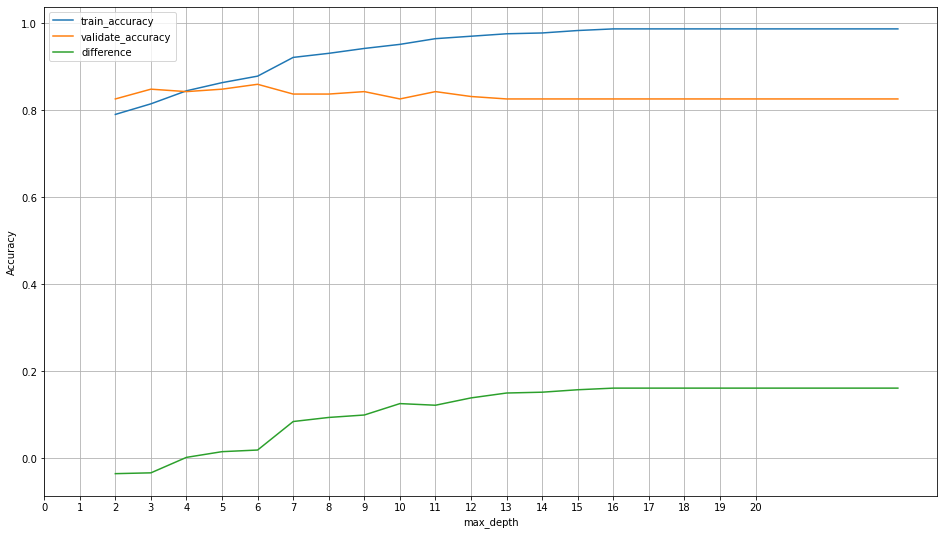

In [75]:
df.set_index('max_depth').plot(figsize = (16,9))
plt.ylabel('Accuracy')
plt.xticks(np.arange(0,21,1))
plt.grid()

## Increasing samples per leaf, less max depth

In [77]:
metrics = []
max_depth = 20

for i in range(2, max_depth):
    # Make the model
    depth = max_depth - i
    n_samples = i
    my_forest = RandomForestClassifier(max_depth=depth, min_samples_leaf=n_samples, random_state=248)

    # Fit the model
    my_forest = my_forest.fit(X_train, y_train)

    # Use the model
    in_sample_accuracy = my_forest.score(X_train, y_train)
    out_of_sample_accuracy = my_forest.score(X_validate, y_validate)

    output = {
        "min_samples_per_leaf": n_samples,
        "max_depth": depth,
        "train_accuracy": in_sample_accuracy,
        "validate_accuracy": out_of_sample_accuracy
    }
    metrics.append(output)
    
df = pd.DataFrame(metrics)
df["difference"] = df.train_accuracy - df.validate_accuracy
df


,min_samples_per_leaf,max_depth,train_accuracy,validate_accuracy,difference
0,2,18,0.911985,0.831461,0.080524
1,3,17,0.893258,0.853933,0.039326
2,4,16,0.876404,0.853933,0.022472
3,5,15,0.874532,0.848315,0.026217
4,6,14,0.867041,0.848315,0.018727
5,7,13,0.861423,0.859551,0.001873
6,8,12,0.844569,0.842697,0.001873
7,9,11,0.844569,0.842697,0.001873
8,10,10,0.837079,0.853933,-0.016854
9,11,9,0.850187,0.848315,0.001873


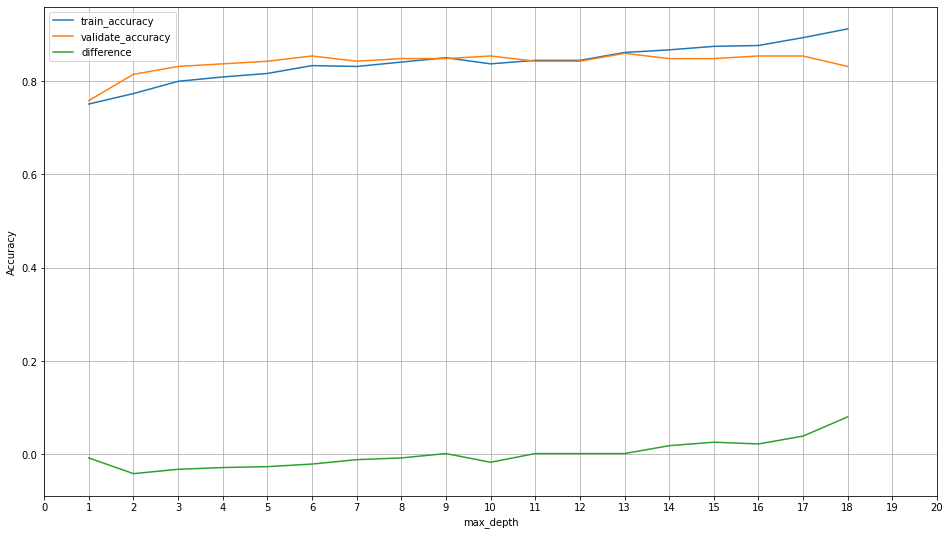

In [78]:
df.set_index('max_depth')[['train_accuracy', 'validate_accuracy','difference']].plot(figsize = (16,9))
plt.ylabel('Accuracy')
plt.xticks(np.arange(0,21,1))
plt.grid()

## Increase both min_samples_per_leaf and max depth

In [79]:
metrics = []
max_depth = 20

for i in range(2, max_depth):
    # Make the model
    depth = i
    n_samples = i
    my_forest = RandomForestClassifier(max_depth=depth, min_samples_leaf=n_samples, random_state=248)

    # Fit the model
    my_forest = my_forest.fit(X_train, y_train)

    # Use the model
    in_sample_accuracy = my_forest.score(X_train, y_train)
    out_of_sample_accuracy = my_forest.score(X_validate, y_validate)

    output = {
        "min_samples_per_leaf": n_samples,
        "max_depth": depth,
        "train_accuracy": in_sample_accuracy,
        "validate_accuracy": out_of_sample_accuracy
    }
    metrics.append(output)
    
df = pd.DataFrame(metrics)
df["difference"] = df.train_accuracy - df.validate_accuracy
df

,min_samples_per_leaf,max_depth,train_accuracy,validate_accuracy,difference
0,2,2,0.790262,0.825843,-0.035581
1,3,3,0.820225,0.853933,-0.033708
2,4,4,0.840824,0.853933,-0.013109
3,5,5,0.846442,0.848315,-0.001873
4,6,6,0.853933,0.848315,0.005618
5,7,7,0.844569,0.853933,-0.009363
6,8,8,0.846442,0.842697,0.003745
7,9,9,0.846442,0.842697,0.003745
8,10,10,0.837079,0.853933,-0.016854
9,11,11,0.846442,0.848315,-0.001873


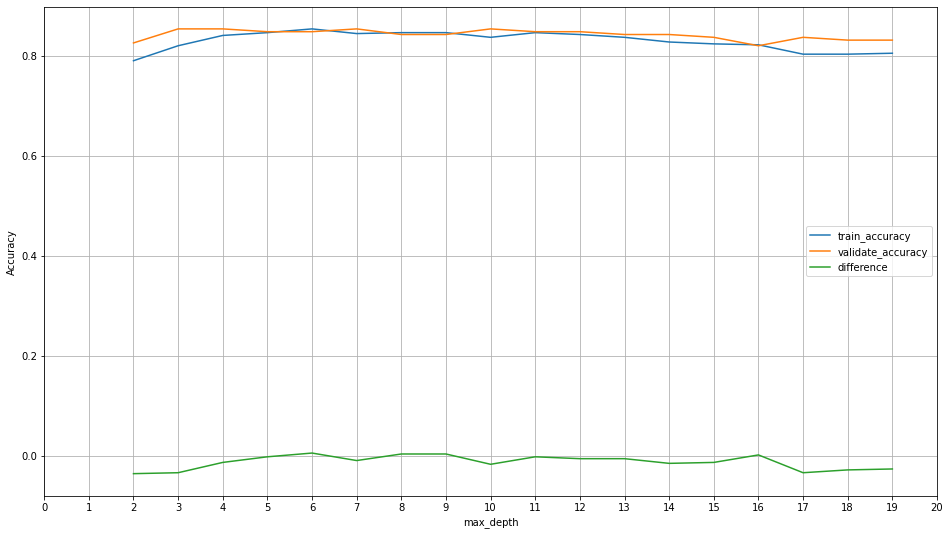

In [80]:
df.set_index('max_depth')[['train_accuracy', 'validate_accuracy','difference']].plot(figsize = (16,9))
plt.ylabel('Accuracy')
plt.xticks(np.arange(0,21,1))
plt.grid()

# -----------------------------------------------

# Lesson: K-Nearest Neighbor (KNN)

## 1. Fit a K-Nearest Neighbors classifier to your training sample and transform (i.e. make predictions on the training sample)

In [81]:
x_tr.head()

,pclass,isMale,age,sibsp,parch,fare,embark_town,alone
304,3,1,28.0,0,0,8.0500,1.0,1
718,3,1,28.0,0,0,15.5000,3.0,1
102,1,1,21.0,0,1,77.2875,1.0,0
737,1,1,35.0,0,0,512.3292,2.0,1
269,1,0,35.0,0,0,135.6333,1.0,1


In [102]:
x_tr.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 534 entries, 304 to 133
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   pclass       534 non-null    int64  
 1   isMale       534 non-null    object 
 2   age          534 non-null    float64
 3   sibsp        534 non-null    int64  
 4   parch        534 non-null    int64  
 5   fare         534 non-null    float64
 6   embark_town  534 non-null    float64
 7   alone        534 non-null    int64  
dtypes: float64(3), int64(4), object(1)
memory usage: 37.5+ KB


weights = ['uniform', 'density']

knn = KNeighborsClassifier(n_neighbors=5, weights='uniform')

##### Creating the KNN object

In [82]:
knn = KNeighborsClassifier(n_neighbors=5, weights='uniform')

##### Fit the model (don't forget to save back into the variable)

In [83]:
knn = knn.fit(x_tr, y_tr)
knn

KNeighborsClassifier()

##### I'm classifying by estimated survival
>**This produces an array of prediction for the training set**

In [84]:
y_predict = knn.predict(x_tr)

##### Estimate the probability of survival, using the training data.

In [85]:
y_pred_proba = knn.predict_proba(x_tr)
y_pred_proba

array([[1. , 0. ],
       [0.8, 0.2],
       [0.6, 0.4],
       ...,
       [0.6, 0.4],
       [0.6, 0.4],
       [0.4, 0.6]])

##### Compute Accuracy (Training Data)

In [86]:
print('KNN classifier Accuracy: {:.2f}'.format(knn.score(x_tr, y_tr)))

KNN classifier Accuracy: 0.78


## 2. Evaluate your results using the model score, confusion matrix, and classification report.

##### Confusion Matrix (Training Data)

In [87]:
confus = pd.DataFrame(confusion_matrix(y_tr, y_predict))
confus

,0,1
0,279,41
1,75,139


##### Classification Report (Training Data)

In [89]:
print(classification_report(y_tr, y_predict))

              precision    recall  f1-score   support

           0       0.79      0.87      0.83       320
           1       0.77      0.65      0.71       214

    accuracy                           0.78       534
   macro avg       0.78      0.76      0.77       534
weighted avg       0.78      0.78      0.78       534



##### Model Score

In [90]:
print(f'Model Score: {knn.score(x_tr, y_tr):.3f}')

Model Score: 0.783


## 3. Print and clearly label the following: Accuracy, true positive rate, false positive rate, true negative rate, false negative rate, precision, recall, f1-score, and support.

In [91]:
TP = confus.iloc[0,0]
TN = confus.iloc[1,1]
FP = confus.iloc[0,1]
FN = confus.iloc[1,0]
print('TP, TN, FP, FN rates:')
print()
print(f'TP - True Positive rate:  {TP/(TP+TN+FP+FN):.3f}')
print(f'FP - False Positive rate: {FP/(TP+TN+FP+FN):.3f}')
print(f'TN - True Negative rate:  {TN/(TP+TN+FP+FN):.3f}')
print(f'FN - False Negative rate: {FN/(TP+TN+FP+FN):.3f}')

TP, TN, FP, FN rates:

TP - True Positive rate:  0.522
FP - False Positive rate: 0.077
TN - True Negative rate:  0.260
FN - False Negative rate: 0.140


In [92]:
print(f'Precision: {precision_score(y_tr, y_predict):.3f}%')
print()
print(f'   Recall: {recall_score(y_tr, y_predict):.3f}%')
print()
print(f'       F1: {f1_score(y_tr, y_predict):.3f}%')
print()
print(f'  Support: NotSurvived: {TP+FP}')
print(f'           Survived:    {TN+FN}')

Precision: 0.772%

   Recall: 0.650%



TypeError: 'numpy.float64' object is not callable

## 4. Run through steps 2-4 setting k to 10

In [93]:
knn10 = KNeighborsClassifier(n_neighbors=10, weights='uniform')
knn10

KNeighborsClassifier(n_neighbors=10)

In [94]:
knn10 = knn10.fit(x_tr, y_tr)
knn10

KNeighborsClassifier(n_neighbors=10)

In [95]:
y_predict10 = knn10.predict(x_tr)

In [96]:
y_pred_proba10 = knn10.predict_proba(x_tr)
y_pred_proba10

array([[1. , 0. ],
       [0.8, 0.2],
       [0.6, 0.4],
       ...,
       [0.6, 0.4],
       [0.3, 0.7],
       [0.4, 0.6]])

In [97]:
confus10 = pd.DataFrame(confusion_matrix(y_tr, y_predict10))
confus10

,0,1
0,283,37
1,96,118


In [98]:
pd.DataFrame(classification_report(y_tr, y_predict10, output_dict=True))

,0,1,accuracy,macro avg,weighted avg
precision,0.746702,0.761290,0.750936,0.753996,0.752548
recall,0.884375,0.551402,0.750936,0.717888,0.750936
f1-score,0.809728,0.639566,0.750936,0.724647,0.741536
support,320.000000,214.000000,0.750936,534.000000,534.000000


In [99]:
#print(f'KNN(10) Classifier Accuracy: {accuracy_score(x_tr, y_tr)}')
print(f'Model Score: {knn10.score(x_tr, y_tr):.3f}')

Model Score: 0.751


In [100]:
TP = confus10.iloc[0,0]
TN = confus10.iloc[1,1]
FP = confus10.iloc[0,1]
FN = confus10.iloc[1,0]
print('TP, TN, FP, FN rates:')
print()
print(f'TP({TP})- True Positive rate:  {TP/(TP+TN+FP+FN):.3f}')
print(f'FP({FP})- False Positive rate: {FP/(TP+TN+FP+FN):.3f}')
print(f'TN({TN})- True Negative rate:  {TN/(TP+TN+FP+FN):.3f}')
print(f'FN({FN})- False Negative rate: {FN/(TP+TN+FP+FN):.3f}')

TP, TN, FP, FN rates:

TP(283)- True Positive rate:  0.530
FP(37)- False Positive rate: 0.069
TN(118)- True Negative rate:  0.221
FN(96)- False Negative rate: 0.180


In [101]:
print(f'TP:{TP}')
print(f'FP:{FP}')
print(f'TN:{TN}')
print(f'FN:{FN}')
print()
print(f'Accuracy:  {(TP+TN)/(TP+TN+FP+FN):.3f}%')
print()
print(f'Precision: {precision_score(y_tr, y_predict10):.3f}%')
print()
print(f'   Recall: {recall_score(y_tr, y_predict10):.3f}%')
print()
print(f'       F1: {f1_score(y_tr, y_predict10):.3f}%')
print()
print(f'  Support: NotSurvived: {TP+FP}')
print(f'           Survived:    {TN+FN}')

TP:283
FP:37
TN:118
FN:96

Accuracy:  0.751%

Precision: 0.761%

   Recall: 0.551%



TypeError: 'numpy.float64' object is not callable

## 5. Run through setps 2-4 setting k to 20

In [103]:
x_tr.head()

,pclass,isMale,age,sibsp,parch,fare,embark_town,alone
304,3,1,28.0,0,0,8.0500,1.0,1
718,3,1,28.0,0,0,15.5000,3.0,1
102,1,1,21.0,0,1,77.2875,1.0,0
737,1,1,35.0,0,0,512.3292,2.0,1
269,1,0,35.0,0,0,135.6333,1.0,1


**Create the KNN object**

In [104]:
knn20 = KNeighborsClassifier(n_neighbors=20, weights='uniform')

**Fit the model**

In [105]:
knn20 = knn20.fit(x_tr, y_tr)
knn20

KNeighborsClassifier(n_neighbors=20)

In [106]:
y_predict20 = knn20.predict(x_tr)

In [107]:
y_pred_proba20 = knn20.predict_proba(x_tr)
y_pred_proba20

array([[1.  , 0.  ],
       [0.7 , 0.3 ],
       [0.45, 0.55],
       ...,
       [0.6 , 0.4 ],
       [0.25, 0.75],
       [0.65, 0.35]])

In [108]:
confus20 = pd.DataFrame(confusion_matrix(y_tr, y_predict20))
confus20

,0,1
0,270,50
1,99,115


In [113]:
print(classification_report(y_tr, y_predict20))

              precision    recall  f1-score   support

           0       0.73      0.84      0.78       320
           1       0.70      0.54      0.61       214

    accuracy                           0.72       534
   macro avg       0.71      0.69      0.70       534
weighted avg       0.72      0.72      0.71       534



In [110]:
#print('KNN(20) classifier Accuracy: {:.2f}'.format(knn20.score(x_tr, y_tr)))
print(f'Model Score: {knn20.score(x_tr, y_tr):.3f}')

Model Score: 0.721


In [111]:
TP = confus20.iloc[0,0]
TN = confus20.iloc[1,1]
FP = confus20.iloc[0,1]
FN = confus20.iloc[1,0]
print('TP, TN, FP, FN rates:')
print()
print(f'TP({TP}) - True Positive rate:  {TP/(TP+TN+FP+FN):.3f}')
print(f'FP({FP}) - False Positive rate: {FP/(TP+TN+FP+FN):.3f}')
print(f'TN({TN}) - True Negative rate:  {TN/(TP+TN+FP+FN):.3f}')
print(f'FN({FN}) - False Negative rate: {FN/(TP+TN+FP+FN):.3f}')

TP, TN, FP, FN rates:

TP(270) - True Positive rate:  0.506
FP(50) - False Positive rate: 0.094
TN(115) - True Negative rate:  0.215
FN(99) - False Negative rate: 0.185


In [112]:
print(f'TP:{TP}')
print(f'FP:{FP}')
print(f'TN:{TN}')
print(f'FN:{FN}')
print()
print(f'Accuracy:  {(TP+TN)/(TP+TN+FP+FN):.3f}%')
print()
print(f'Precision: {precision_score(y_tr, y_predict):.3f}%')
print()
print(f'   Recall: {recall_score(y_tr, y_predict):.3f}%')
print()
print(f'       F1: {f1_score(y_tr, y_predict):.3f}%')
print()
print(f'  Support: NotSurvived: {TP+FP}')
print(f'           Survived:    {TN+FN}')

TP:270
FP:50
TN:115
FN:99

Accuracy:  0.721%

Precision: 0.772%

   Recall: 0.650%



TypeError: 'numpy.float64' object is not callable

## 6. What are the differences in the evaluation metrics? Which performs better on your in-sample data? Why?

NEED TO RUN SAME KNN ON VAL, NTO NEW ONE

In [114]:
knn_val = KNeighborsClassifier(n_neighbors=20, weights='uniform')
knn_val.fit(x_val, y_val)

KNeighborsClassifier(n_neighbors=20)

In [115]:
y_predict = knn_val.predict(x_val)

In [116]:
y_pred_proba = knn_val.predict_proba(x_val)

In [117]:
print('KNN classifier accuracy(validate): {:.2f}'
     .format(knn_val.score(x_val, y_val)))

KNN classifier accuracy(validate): 0.71


## 7. Which model performs best on our out-of-sample data from validate?

In [118]:
y_predict = knn.predict(x_val)
y_pred_prob_val = knn.predict_proba(x_val)

In [123]:
print(classification_report(y_val, y_predict))

              precision    recall  f1-score   support

           0       0.77      0.82      0.80       118
           1       0.60      0.52      0.55        60

    accuracy                           0.72       178
   macro avg       0.68      0.67      0.67       178
weighted avg       0.71      0.72      0.71       178



In [124]:
y_predict10 = knn10.predict(x_val)
y_pred_prob_val10 = knn10.predict_proba(x_val)

In [125]:
print(classification_report(y_val, y_predict10))

              precision    recall  f1-score   support

           0       0.75      0.86      0.80       118
           1       0.62      0.43      0.51        60

    accuracy                           0.72       178
   macro avg       0.68      0.65      0.66       178
weighted avg       0.71      0.72      0.70       178



In [126]:
y_predict20 = knn20.predict(x_val)
y_pred_prob_val20 = knn20.predict_proba(x_val)

In [127]:
print(classification_report(y_val, y_predict20))

              precision    recall  f1-score   support

           0       0.75      0.80      0.77       118
           1       0.54      0.47      0.50        60

    accuracy                           0.69       178
   macro avg       0.64      0.63      0.64       178
weighted avg       0.68      0.69      0.68       178



#### KNN 10 works best

# ----------------------------------------------------------

# __Lesson: Logistic Regression__

### Instructions:
In these exercises, we'll continue working with the titanic dataset and building logistic regression models. Throughout this exercise, be sure you are training, evaluation, and comparing models on the train and validate datasets. The test dataset should only be used for your final model.

For all of the models you create, choose a threshold that optimizes for accuracy.

***

## Model 1
### Make the model
**Create the object**

logit = LogisticRegression(C=1, class_weight={0:1, 1:99}, random_state=123, intercept_scaling=1, solver='lbfgs')

**Fit the model**Fit the random forest algorithm to the training data.

logit.fit(X_train, y_train)

LogisticRegression(C=1, class_weight={0: 1, 1: 99}, random_state=123)

**Feature Importance**Evaluate importance, or weight, of each feature, using the coefficients.

Evaluate the intercept of the model.

print('Coefficient: \n', logit.coef_)
print('Intercept: \n', logit.intercept_)

**Make Predictions**Estimate whether or not the species is versicolor for each observation, using the training data.

y_pred = logit.predict(X_train)

**Estimate Probability**Estimate the probability of species being versicolor for each observation, using the training data.

y_pred_proba = logit.predict_proba(X_train)
***
### Evaluate the Model
**Compute the Accuracy**

print('Accuracy of Logistic Regression classifier on training set: {:.2f}'.format(logit.score(X_train, y_train)))
     
**Create a confusion matrix**

print(confusion_matrix(y_train, y_pred))

**Create a classification report**

print(classification_report(y_train, y_pred))
***
## Model 2
### Make the Model
**Create the object**

logit2 = LogisticRegression(C=.1, class_weight={0:1, 1:99}, random_state=123, intercept_scaling=1, solver='lbfgs')

**Fit the model:**Fit the random forest algorithm to the training data.

logit2.fit(X_train, y_train)

LogisticRegression(C=0.1, class_weight={0: 1, 1: 99}, random_state=123)

**Feature Importance:**Evaluate importance, or weight, of each feature, using the coefficients.Evaluate the intercept of the model.

print('Coefficient: \n', logit2.coef_)
print('Intercept: \n', logit2.intercept_)

**Make Predictions:**Estimate whether or not the species is versicolor for each observation, using the training data.

y_pred2 = logit2.predict(X_train)

**Estimate Probability**

Estimate the probability of species being versicolor for each observation, using the training data.

y_pred_proba2 = logit2.predict_proba(X_train)
***
### Evaluate Model
**Compute the Accuracy**

print('Accuracy of Logistic Regression classifier on training set: {:.2f}'.format(logit2.score(X_train, y_train)))

**Create a confusion matrix**

print(confusion_matrix(y_train, y_pred2))

**Create a classification report**

print(classification_report(y_train, y_pred2))

**Compute Scores**

Accuracy<br>
Precision<br>
Recall<br>
F1 Score<br>
Support

### Validate Models
### Test Model
### Visualize Models

***

## 1. Create a model that includes age in addition to fare and pclass. Does this model perform better than your baseline? 

In [128]:
titanic = acquire.grab_titanic_data()
titanic.head(3)

,Unnamed: 0,passenger_id,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,deck,embark_town,alone
0,0,0,0,3,male,22.0,1,0,7.2500,S,Third,NaN,Southampton,0
1,1,1,1,1,female,38.0,1,0,71.2833,C,First,C,Cherbourg,0
2,2,2,1,3,female,26.0,0,0,7.9250,S,Third,NaN,Southampton,1


In [129]:
titanic = acquire.prep_titanic(titanic)
titanic.head(3)

,survived,pclass,isMale,age,sibsp,parch,fare,embark_town,alone
0,0,3,1,22.0,1,0,7.2500,1.0,0
1,1,1,0,38.0,1,0,71.2833,2.0,0
2,1,3,0,26.0,0,0,7.9250,1.0,1


In [130]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   survived     891 non-null    int64  
 1   pclass       891 non-null    int64  
 2   isMale       891 non-null    object 
 3   age          891 non-null    float64
 4   sibsp        891 non-null    int64  
 5   parch        891 non-null    int64  
 6   fare         891 non-null    float64
 7   embark_town  891 non-null    float64
 8   alone        891 non-null    int64  
dtypes: float64(3), int64(5), object(1)
memory usage: 62.8+ KB


In [131]:
titanic['baseline'] = 0

In [133]:
titanic.head(2)

,survived,pclass,isMale,age,sibsp,parch,fare,embark_town,alone,baseline
0,0,3,1,22.0,1,0,7.2500,1.0,0,0
1,1,1,0,38.0,1,0,71.2833,2.0,0,0


In [134]:
#print(f'Baseline accuracy: {metrics.accuracy_score(titanic.survived, titanic.baseline):.3f}, This is predicting for non-survival')

In [135]:
train, validate, test = acquire.split(titanic)
train.shape, validate.shape, test.shape

((534, 10), (178, 10), (179, 10))

In [136]:
X_train = train.drop(columns={'survived','baseline'})
y_train = train.survived
X_validate = validate.drop(columns={'survived','baseline'})
y_validate = validate.survived
X_test = test.drop(columns={'survived','baseline'})
y_test = test.survived

##### Define Logistic Regression Model

In [137]:
logit = LogisticRegression(random_state=248)#C=.1, class_weight={0:1, 1:99}, random_state=248, intercept_scaling=1, solver='lbfgs')

##### Fit the model to the train data

In [138]:
logit.fit(X_train, y_train)

LogisticRegression(random_state=248)

##### Make predictions using the model

In [139]:
y_pred = logit.predict(X_train)
y_pred[:10]

array([0, 0, 1, 1, 1, 0, 1, 0, 0, 0])

In [141]:
y_pred_proba_logit = logit.predict_proba(X_train)
y_pred_proba_logit = pd.DataFrame(y_pred_proba_logit, columns=['NotSurvive', 'Survive'])
y_pred_proba_logit.head(10)

,NotSurvive,Survive
0,0.888720,0.111280
1,0.872770,0.127230
2,0.277540,0.722460
3,0.234243,0.765757
4,0.093453,0.906547
5,0.908249,0.091751
6,0.370202,0.629798
7,0.590165,0.409835
8,0.673378,0.326622
9,0.980333,0.019667


In [143]:
print(classification_report(y_train, y_pred))

              precision    recall  f1-score   support

           0       0.81      0.86      0.84       320
           1       0.77      0.71      0.74       214

    accuracy                           0.80       534
   macro avg       0.79      0.78      0.79       534
weighted avg       0.80      0.80      0.80       534



### With just pclass, age, fare

In [144]:
titanic.head(3)

,survived,pclass,isMale,age,sibsp,parch,fare,embark_town,alone,baseline
0,0,3,1,22.0,1,0,7.2500,1.0,0,0
1,1,1,0,38.0,1,0,71.2833,2.0,0,0
2,1,3,0,26.0,0,0,7.9250,1.0,1,0


In [145]:
dt = titanic.drop(columns={'embark_town', 'alone', 'sibsp', 'parch',
                  'isMale'})
dt.head(3)

,survived,pclass,age,fare,baseline
0,0,3,22.0,7.2500,0
1,1,1,38.0,71.2833,0
2,1,3,26.0,7.9250,0


In [146]:
train, validate, test = acquire.split(dt)
train.shape, validate.shape, test.shape

((534, 5), (178, 5), (179, 5))

In [147]:
X_train = train.drop(columns={'survived','baseline'})
y_train = train.survived
X_validate = validate.drop(columns={'survived','baseline'})
y_validate = validate.survived
X_test = test.drop(columns={'survived','baseline'})
y_test = test.survived

In [148]:
logit.fit(X_train, y_train)

LogisticRegression(random_state=248)

In [149]:
y_pred = logit.predict(X_train)
y_pred[:20]

array([0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1])

In [150]:
y_pred_proba = logit.predict_proba(X_train)
y_pred_proba = pd.DataFrame(y_pred_proba, columns=['NotSurvive', 'Survive'])
y_pred_proba.head(10)

,NotSurvive,Survive
0,0.762711,0.237289
1,0.756428,0.243572
2,0.224624,0.775376
3,0.061889,0.938111
4,0.273070,0.726930
5,0.805457,0.194543
6,0.186862,0.813138
7,0.815493,0.184507
8,0.447797,0.552203
9,0.567083,0.432917


In [154]:
print(classification_report(y_train, y_pred))

              precision    recall  f1-score   support

           0       0.70      0.83      0.76       320
           1       0.66      0.47      0.55       214

    accuracy                           0.69       534
   macro avg       0.68      0.65      0.66       534
weighted avg       0.68      0.69      0.68       534



## 2. Include sex in your model as well. Note that you'll need to encode or create a dummy variable of this feature before including it in a model.

In [155]:
titanic.head(3)

,survived,pclass,isMale,age,sibsp,parch,fare,embark_town,alone,baseline
0,0,3,1,22.0,1,0,7.2500,1.0,0,0
1,1,1,0,38.0,1,0,71.2833,2.0,0,0
2,1,3,0,26.0,0,0,7.9250,1.0,1,0


In [156]:
withsex = titanic.drop(columns={'embark_town', 'alone', 'sibsp', 'parch'})
withsex.head(3)

,survived,pclass,isMale,age,fare,baseline
0,0,3,1,22.0,7.2500,0
1,1,1,0,38.0,71.2833,0
2,1,3,0,26.0,7.9250,0


In [157]:
train, validate, test = acquire.split(withsex)
train.shape, validate.shape, test.shape

((534, 6), (178, 6), (179, 6))

In [158]:
X_train = train.drop(columns={'survived','baseline'})
y_train = train.survived
X_validate = validate.drop(columns={'survived','baseline'})
y_validate = validate.survived
X_test = test.drop(columns={'survived','baseline'})
y_test = test.survived

In [159]:
logit.fit(X_train, y_train)

LogisticRegression(random_state=248)

In [160]:
y_pred = logit.predict(X_train)
y_pred[:20]

array([0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1])

In [161]:
y_pred_proba = logit.predict_proba(X_train)
y_pred_proba = pd.DataFrame(y_pred_proba, columns=['NotSurvive', 'Survive'])
y_pred_proba.head(10)

,NotSurvive,Survive
0,0.897273,0.102727
1,0.895999,0.104001
2,0.407574,0.592426
3,0.341245,0.658755
4,0.089263,0.910737
5,0.917676,0.082324
6,0.390648,0.609352
7,0.543937,0.456063
8,0.622098,0.377902
9,0.800811,0.199189


In [163]:
print(classification_report(y_train, y_pred))

              precision    recall  f1-score   support

           0       0.81      0.81      0.81       320
           1       0.72      0.71      0.71       214

    accuracy                           0.77       534
   macro avg       0.76      0.76      0.76       534
weighted avg       0.77      0.77      0.77       534



## 3. Try out other combinations of features and models.

In [164]:
titanic.head(1)

,survived,pclass,isMale,age,sibsp,parch,fare,embark_town,alone,baseline
0,0,3,1,22.0,1,0,7.25,1.0,0,0


In [165]:
m1 = titanic.drop(columns={'parch', 'fare'})
m1.head()

,survived,pclass,isMale,age,sibsp,embark_town,alone,baseline
0,0,3,1,22.0,1,1.0,0,0
1,1,1,0,38.0,1,2.0,0,0
2,1,3,0,26.0,0,1.0,1,0
3,1,1,0,35.0,1,1.0,0,0
4,0,3,1,35.0,0,1.0,1,0


In [166]:
train, validate, test = acquire.split(m1)
train.shape, validate.shape, test.shape

((534, 8), (178, 8), (179, 8))

In [167]:
X_train = train.drop(columns={'survived','baseline'})
y_train = train.survived

X_validate = validate.drop(columns={'survived','baseline'})
y_validate = validate.survived

X_test = test.drop(columns={'survived','baseline'})
y_test = test.survived

In [168]:
logit.fit(X_train, y_train)

LogisticRegression(random_state=248)

In [169]:
y_pred = logit.predict(X_train)
y_pred[:20]

array([0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1])

In [170]:
y_pred_proba = logit.predict_proba(X_train)
y_pred_proba = pd.DataFrame(y_pred_proba, columns=['NotSurvive', 'Survive'])
y_pred_proba.head(10)

,NotSurvive,Survive
0,0.894143,0.105857
1,0.870420,0.129580
2,0.268972,0.731028
3,0.543138,0.456862
4,0.116259,0.883741
5,0.908634,0.091366
6,0.405472,0.594528
7,0.347527,0.652473
8,0.642619,0.357381
9,0.975303,0.024697


In [171]:
print(classification_report(y_train, y_pred))

              precision    recall  f1-score   support

           0       0.82      0.82      0.82       320
           1       0.73      0.72      0.73       214

    accuracy                           0.78       534
   macro avg       0.77      0.77      0.77       534
weighted avg       0.78      0.78      0.78       534



## 4. Use you best 3 models to predict and evaluate on your validate sample.

In [172]:
y_pred_lr = logit.predict(X_validate)

In [173]:
print(classification_report(y_validate, y_pred_lr))

              precision    recall  f1-score   support

           0       0.88      0.87      0.88       118
           1       0.75      0.77      0.76        60

    accuracy                           0.84       178
   macro avg       0.82      0.82      0.82       178
weighted avg       0.84      0.84      0.84       178



## 5. Choose you best model from the validation performation, and evaluate it on the test dataset. How do the performance metrics compare to validate? to train?

In [174]:
y_pred_lr_test = logit.predict(X_test)

In [175]:
print(classification_report(y_test, y_pred_lr_test))

              precision    recall  f1-score   support

           0       0.84      0.86      0.85       111
           1       0.76      0.74      0.75        68

    accuracy                           0.81       179
   macro avg       0.80      0.80      0.80       179
weighted avg       0.81      0.81      0.81       179



Bonus1 How do different strategies for handling the missing values in the age column affect model performance?

Bonus2: How do different strategies for encoding sex affect model performance?

Bonus3: scikit-learn's LogisticRegression classifier is actually applying a regularization penalty to the coefficients by default. This penalty causes the magnitude of the coefficients in the resulting model to be smaller than they otherwise would be. This value can be modified with the C hyper parameter. Small values of C correspond to a larger penalty, and large values of C correspond to a smaller penalty.
Try out the following values for C and note how the coefficients and the model's performance on both the dataset it was trained on and on the validate split are affected.
C
=
.01
,
.1
,
1
,
10
,
100
,
1000
Bonus Bonus: how does scaling the data interact with your choice of C?

<div class="alert alert-block alert-info">
<b>Tip:</b> Use blue boxes (alert-info) for tips and notes. 
If it’s a note, you don’t have to include the word “Note”.
</div>

<div class="alert alert-block alert-warning">
<b>Example:</b> Use yellow boxes for examples that are not 
inside code cells, or use for mathematical formulas if needed.
</div>

<div class="alert alert-block alert-success">
<b>Up to you:</b> Use green boxes sparingly, and only for some specific 
purpose that the other boxes can't cover. For example, if you have a lot 
of related content to link to, maybe you decide to use green boxes for 
related links from each section of a notebook.
</div>

<div class="alert alert-block alert-danger">
<b>Just don't:</b> In general, avoid the red boxes. These should only be
used for actions that might cause data loss or another major issue.
</div>

***

&#9719;</p>

In [ ]:
LogisticRegression?

In [ ]:
has_churned = [1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0]
prediction = [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

In [ ]:
confusion_matrix(has_churned, prediction)

In [ ]:
print(classification_report(has_churned, prediction))